# Import

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from scipy import stats

import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams["font.size"] = 20

# Read Data

In [3]:
qm9 = pd.read_csv("qm_ext_plus.csv")
qm9["mol"] = qm9["smiles"].apply(Chem.MolFromSmiles)

In [4]:
qm9.dropna()

,Unnamed: 0,smiles,mu,alpha,homo,lumo,gap,zpve,cv,u0,u298,h298,g298,num_atoms,mol
0,0,C,0.0000,13.210000,-0.387700,0.117100,0.504800,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597,1,<rdkit.Chem.rdchem.Mol object at 0x7f726fa75540>
1,1,N,1.6256,9.460000,-0.257000,0.082900,0.339900,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961,1,<rdkit.Chem.rdchem.Mol object at 0x7f726fa75420>
2,2,O,1.8511,6.310000,-0.292800,0.068700,0.361500,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349,1,<rdkit.Chem.rdchem.Mol object at 0x7f726fa753c0>
3,3,C#C,0.0000,16.280000,-0.284500,0.050600,0.335100,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429,2,<rdkit.Chem.rdchem.Mol object at 0x7f726fa75360>
4,4,C#N,2.8937,12.990000,-0.360400,0.019100,0.379600,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246,2,<rdkit.Chem.rdchem.Mol object at 0x7f726fa75300>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155318,155584,CCCCCC(Cl)(Cl)Cl,1.6998,91.438949,-0.437290,0.151861,0.589151,0.160407,39.627,-1615.134404,-1615.123029,-1615.122085,-1615.173678,9,<rdkit.Chem.rdchem.Mol object at 0x7f726cff3e20>
155319,155585,CCCNCC(Cl)(Cl)Cl,1.0758,88.241518,-0.375428,0.153217,0.528645,0.149152,39.102,-1631.162686,-1631.151460,-1631.150516,-1631.201471,9,<rdkit.Chem.rdchem.Mol object at 0x7f726cff3e80>
155320,155586,CCCOCC(Cl)(Cl)Cl,1.9364,83.988712,-0.429957,0.153811,0.583768,0.136716,37.857,-1651.020205,-1651.009166,-1651.008222,-1651.058816,9,<rdkit.Chem.rdchem.Mol object at 0x7f726cff3ee0>
155321,155587,CCOCCC(Cl)(Cl)Cl,2.3204,84.138259,-0.422295,0.154023,0.576318,0.136364,37.923,-1651.020962,-1651.009802,-1651.008857,-1651.060263,9,<rdkit.Chem.rdchem.Mol object at 0x7f726cff3f40>


In [5]:
db_conf = pd.read_parquet("db_conf.parquet")
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
# db_conf.drop(columns=["CONF", "CONFCl", "CONFClBr", "CONFClBrI"], inplace=True)
db_conf

,db_idx,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol
0,162,CNc1cccc(C)c1,0.849,nB,[6],None,None,None,[213],"[929, 939]","[4340, 5388]",[32107],<rdkit.Chem.rdchem.Mol object at 0x7f726c178d60>
1,480,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]",<rdkit.Chem.rdchem.Mol object at 0x7f726c178e80>
2,375,CCCCCCCC/C=C\CCCCCCCCCCCCC,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245],<rdkit.Chem.rdchem.Mol object at 0x7f726c178ee0>
3,540,Clc1ccccc1Cl,2.500,nB,None,None,None,None,[213],[134076],[135440],None,<rdkit.Chem.rdchem.Mol object at 0x7f726c178f40>
4,74,Nc1cccc([N+](=O)[O-])c1,0.522,nB,None,None,None,None,[213],[939],[4360],[131914],<rdkit.Chem.rdchem.Mol object at 0x7f726c178fa0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,920,CC1=C(C)S(=O)(=O)CCS1(=O)=O,0.633,nB,[6],None,None,None,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135085, 135403, 135404]",[145103],<rdkit.Chem.rdchem.Mol object at 0x7f726c191300>
1002,599,FC(F)(F)c1ccc(Cl)c(Cl)c1,3.176,B,[6],None,None,None,[213],"[929, 134076]","[134377, 134381, 135440]",[137743],<rdkit.Chem.rdchem.Mol object at 0x7f726c191360>
1003,457,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322...",<rdkit.Chem.rdchem.Mol object at 0x7f726c1913c0>
1004,347,CC(C)N(C(=O)CCl)c1ccccc1,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]",<rdkit.Chem.rdchem.Mol object at 0x7f726c191420>


In [6]:
na_ind = db_conf[db_conf.iloc[:,4:-1].isna().all(axis=1)].index

In [7]:
db_conf = db_conf.drop(index=na_ind)

# Labels Encoding

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
le.fit(["nB", "B"])
db_conf["class_encoded"] = le.transform(db_conf["Experimental BCF class"])

In [10]:
db_conf["class_encoded"] = db_conf["class_encoded"].replace({1:0, 0:1})

In [11]:
db_conf

,db_idx,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol,class_encoded
0,162,CNc1cccc(C)c1,0.849,nB,[6],None,None,None,[213],"[929, 939]","[4340, 5388]",[32107],<rdkit.Chem.rdchem.Mol object at 0x7f726c178d60>,0
1,480,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]",<rdkit.Chem.rdchem.Mol object at 0x7f726c178e80>,1
2,375,CCCCCCCC/C=C\CCCCCCCCCCCCC,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245],<rdkit.Chem.rdchem.Mol object at 0x7f726c178ee0>,0
3,540,Clc1ccccc1Cl,2.500,nB,None,None,None,None,[213],[134076],[135440],None,<rdkit.Chem.rdchem.Mol object at 0x7f726c178f40>,0
4,74,Nc1cccc([N+](=O)[O-])c1,0.522,nB,None,None,None,None,[213],[939],[4360],[131914],<rdkit.Chem.rdchem.Mol object at 0x7f726c178fa0>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,920,CC1=C(C)S(=O)(=O)CCS1(=O)=O,0.633,nB,[6],None,None,None,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135085, 135403, 135404]",[145103],<rdkit.Chem.rdchem.Mol object at 0x7f726c191300>,0
1002,599,FC(F)(F)c1ccc(Cl)c(Cl)c1,3.176,B,[6],None,None,None,[213],"[929, 134076]","[134377, 134381, 135440]",[137743],<rdkit.Chem.rdchem.Mol object at 0x7f726c191360>,1
1003,457,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322...",<rdkit.Chem.rdchem.Mol object at 0x7f726c1913c0>,0
1004,347,CC(C)N(C(=O)CCl)c1ccccc1,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]",<rdkit.Chem.rdchem.Mol object at 0x7f726c191420>,0


In [12]:
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
db_conf["num_atoms"] = db_conf["mol"].apply(lambda x: x.GetNumAtoms())

# Calculate FQDs

In [13]:
db_conf_filled = db_conf.copy()

In [14]:
qprops = "mu,alpha,homo,lumo,gap,zpve,u0,u298,h298,g298,cv".split(",")

In [15]:
import statistics
def calculate_FQDs(indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        ret.append(patterns_db[quantum_property][i])
    return statistics.mean(ret)

def calculate_FQDs_quant(mol, indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        n_occurences = len(list(mol.GetSubstructMatch(patterns_db["mol"][i])))
        ret.append(patterns_db[quantum_property][i] * n_occurences)
    return statistics.mean(ret)

In [16]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}"] = db_conf_filled[f"FQD_{num}"].apply(calculate_FQDs, patterns_db=qm9, quantum_property=prop)

In [17]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

/tmp/ipykernel_4936/404896553.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  db_conf_filled[f"FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]
/tmp/ipykernel_4936/404896553.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  db_conf_filled[f"FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]
/tmp/ipykernel_4936/404896553.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

# Quant FQDs

In [18]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}"] = db_conf_filled["mol"].apply(lambda x: calculate_FQDs_quant(x,
                                                                          indices=db_conf_filled[db_conf_filled["mol"]==x][f"FQD_{num}"].iloc[0],
                                                                          patterns_db=qm9,
                                                                          quantum_property=prop)
                                                                         )

In [19]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"quant_FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

In [20]:
import itertools
fqd_cols_qual = []
for num, prop in itertools.product(range(2,10), qprops):
    fqd_cols_qual.append(f"FQD_{num}_{prop}")
fqd_cols_qual_per_atom = [f"{x}_per_atom" for x in fqd_cols_qual]
quant_fqd_cols = [f"quant_{x}" for x in fqd_cols_qual]
quant_fqd_cols_per_atom = [f"quant_{x}" for x in fqd_cols_qual_per_atom]

In [21]:
db_conf_filled.columns[15:]

Index(['FQD_2_mu', 'FQD_3_mu', 'FQD_4_mu', 'FQD_5_mu', 'FQD_6_mu', 'FQD_7_mu',
       'FQD_8_mu', 'FQD_9_mu', 'FQD_2_alpha', 'FQD_3_alpha',
       ...
       'quant_FQD_8_g298_per_atom', 'quant_FQD_9_g298_per_atom',
       'quant_FQD_2_cv_per_atom', 'quant_FQD_3_cv_per_atom',
       'quant_FQD_4_cv_per_atom', 'quant_FQD_5_cv_per_atom',
       'quant_FQD_6_cv_per_atom', 'quant_FQD_7_cv_per_atom',
       'quant_FQD_8_cv_per_atom', 'quant_FQD_9_cv_per_atom'],
      dtype='object', length=352)

In [22]:
cols = db_conf_filled.columns[15:]

# Fill with zeros

In [23]:
# x = db_conf_filled[cols].fillna(0)
# y = db_conf_filled["class_encoded"]

In [24]:
x = db_conf_filled[cols]
y = db_conf_filled["class_encoded"]

# OOB dataset creation

In [25]:
from sklearn.utils import resample

In [26]:
res_x, res_y = resample(x, y, replace=False, n_samples=526, stratify=y, random_state=1)
oob_idx = set(x.index).difference(set(res_x.index))

In [27]:
len(oob_idx)

330

In [28]:
oob_x, oob_y = x.loc[list(oob_idx)], y.loc[list(oob_idx)]

In [29]:
x, y = res_x, res_y

In [30]:
y.value_counts()

0    411
1    115
Name: class_encoded, dtype: int64

In [31]:
oob_y.value_counts()

0    258
1     72
Name: class_encoded, dtype: int64

## Balancing data

In [32]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [33]:
# oversample = SMOTE(random_state=1)
# oversample = RandomOverSampler(random_state=1)
# xx, yy = oversample.fit_resample(x, y)
# xx, yy = xx.sample(frac=1, random_state=1), yy.sample(frac=1, random_state=1)

In [34]:
# yy.value_counts()

# Modelling

# Pipeline creation

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=0.95)

In [37]:
def get_pipeline(name: str, calla):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        # ("pca", pca),
        (name, calla)
    ])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import lightgbm as lgb

In [39]:
scor_dict = {"algorithm": [],
            "balanced_accuracy": [],
            "f1 score": []}

In [40]:
from sklearn.model_selection import StratifiedKFold

def my_score(model, n_folds, scoring_callable, X, Y):
    scores = []
    cv = StratifiedKFold(n_folds)
    oversampler = RandomOverSampler(random_state=1)
    scaler = StandardScaler()
    

    for train_index, validation_index in cv.split(X, Y):
        x, y = X.iloc[train_index], Y.iloc[train_index]
        xx, yy = oversampler.fit_resample(x, y)
        xx, yy = xx.sample(frac=1, random_state=1), yy.sample(frac=1, random_state=1)
        xx = scaler.fit_transform(xx)
        model.fit(xx, yy)
        x_val = scaler.transform(X.iloc[validation_index])
        score = scoring_callable(Y.iloc[validation_index], model.predict(x_val))
        print(score)
        scores.append(score)
    
    return scores

### Baseline

In [41]:
scor_dict["algorithm"].extend(["Baseline"]*5)

In [42]:
dum = DummyClassifier(strategy="uniform", random_state=1)

In [43]:
scores = my_score(dum, 5, balanced_accuracy_score, x, y)

0.48376113148245153
0.5082184517497349
0.5082184517497349
0.4247083775185578
0.5082184517497349


In [44]:
scor_dict["balanced_accuracy"].extend(list(scores))

In [45]:
scores = my_score(dum, 5, f1_score, x, y)

0.2962962962962963
0.32098765432098764
0.32098765432098764
0.24691358024691357
0.32098765432098764


In [46]:
scor_dict["f1 score"].extend(list(scores))

### XGBoost

In [47]:
scor_dict["algorithm"].extend(["XGBoost"]*5)

In [48]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=1)

In [49]:
scores = my_score(xgbc, 5, balanced_accuracy_score, x, y)

0.7778941854374017
0.8112407211028632
0.7059915164369035
0.6903499469777307
0.7216330858960763


In [50]:
scor_dict["balanced_accuracy"].extend(list(scores))

In [51]:
scores = my_score(xgbc, 5, f1_score, x, y)

0.6521739130434783
0.711111111111111
0.5454545454545454
0.5238095238095238
0.5652173913043478


In [52]:
scor_dict["f1 score"].extend(list(scores))

### Light GBM

In [53]:
scor_dict["algorithm"].extend(["Light GBM"]*5)

In [54]:
lgbc = lgb.LGBMClassifier(n_estimators=1000, random_state=1)

In [55]:
scores = my_score(lgbc, 5, balanced_accuracy_score, x, y)

0.7682032477737035
0.8329798515376459
0.6468716861081655
0.6686108165429481
0.718186638388123


In [56]:
scor_dict["balanced_accuracy"].extend(list(scores))

In [57]:
scores = my_score(lgbc, 5, f1_score, x, y)

0.6511627906976744
0.7391304347826085
0.45
0.4878048780487805
0.5714285714285715


In [58]:
scor_dict["f1 score"].extend(list(scores))

### HistGBC

In [59]:
scor_dict["algorithm"].extend(["HGBC"]*5)

In [60]:
hgbc = HistGradientBoostingClassifier(random_state=1)

In [61]:
scores = my_score(hgbc, 5, balanced_accuracy_score, x, y)

0.7561550550026193
0.8112407211028632
0.7025450689289502
0.7059915164369035
0.7059915164369035


In [62]:
scor_dict["balanced_accuracy"].extend(list(scores))

In [63]:
scores = my_score(hgbc, 5, f1_score, x, y)

0.6222222222222223
0.711111111111111
0.55
0.5454545454545454
0.5454545454545454


In [64]:
scor_dict["f1 score"].extend(list(scores))

### Scores vis

In [65]:
scors = pd.DataFrame(scor_dict)
scors

,algorithm,balanced_accuracy,f1 score
0,Baseline,0.483761,0.296296
1,Baseline,0.508218,0.320988
2,Baseline,0.508218,0.320988
3,Baseline,0.424708,0.246914
4,Baseline,0.508218,0.320988
5,XGBoost,0.777894,0.652174
6,XGBoost,0.811241,0.711111
7,XGBoost,0.705992,0.545455
8,XGBoost,0.690350,0.523810
9,XGBoost,0.721633,0.565217


In [66]:
melted = scors.melt(id_vars="algorithm", var_name="metric")
melted

,algorithm,metric,value
0,Baseline,balanced_accuracy,0.483761
1,Baseline,balanced_accuracy,0.508218
2,Baseline,balanced_accuracy,0.508218
3,Baseline,balanced_accuracy,0.424708
4,Baseline,balanced_accuracy,0.508218
5,XGBoost,balanced_accuracy,0.777894
6,XGBoost,balanced_accuracy,0.811241
7,XGBoost,balanced_accuracy,0.705992
8,XGBoost,balanced_accuracy,0.690350
9,XGBoost,balanced_accuracy,0.721633


<AxesSubplot:xlabel='algorithm', ylabel='value'>

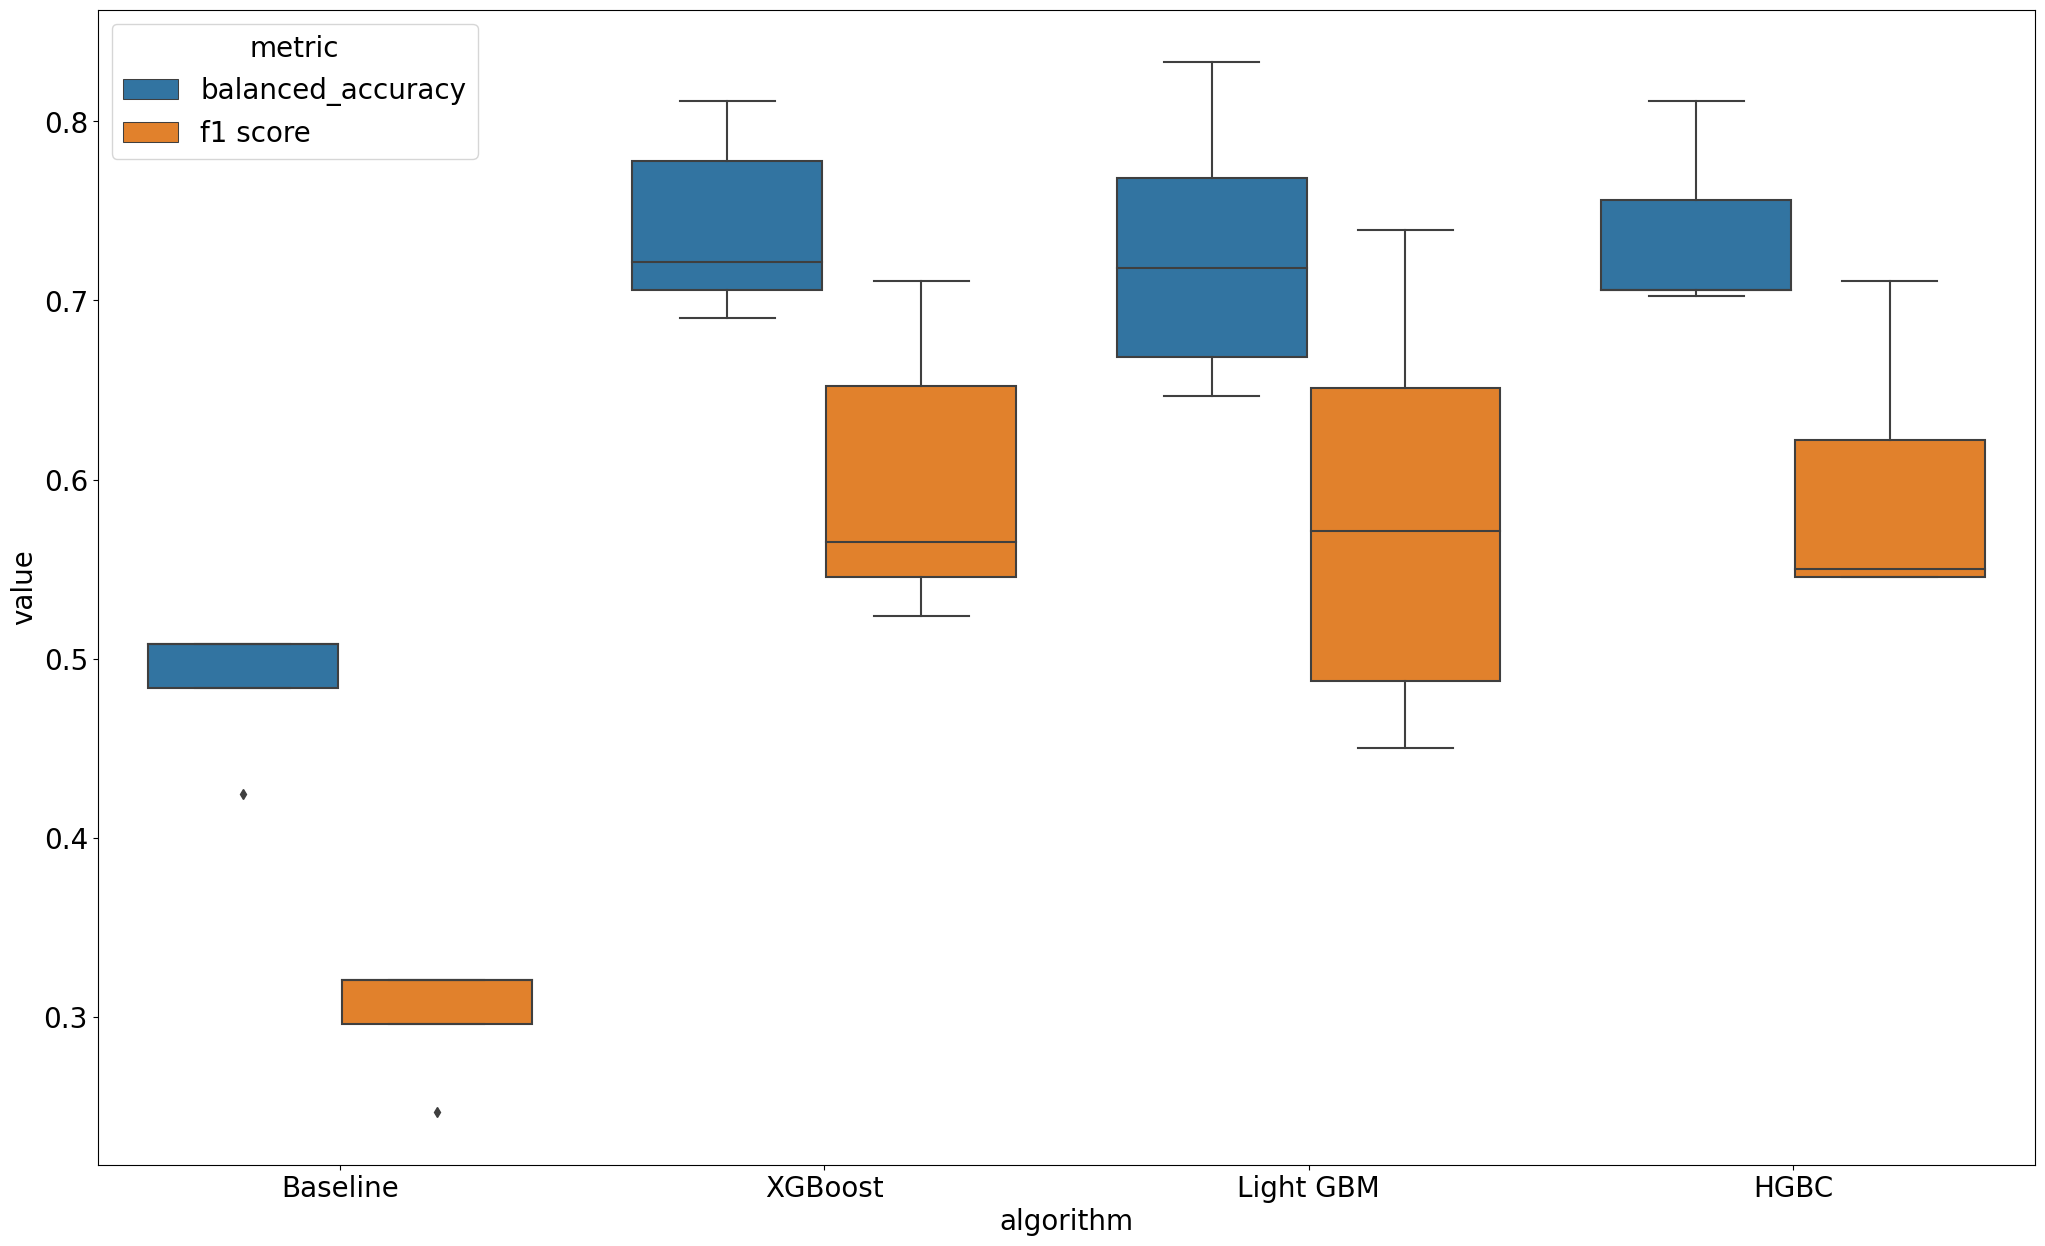

In [67]:
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="algorithm", y="value", data=melted, hue="metric", ax=ax, meanline=True)

Text(0, 0.5, '')

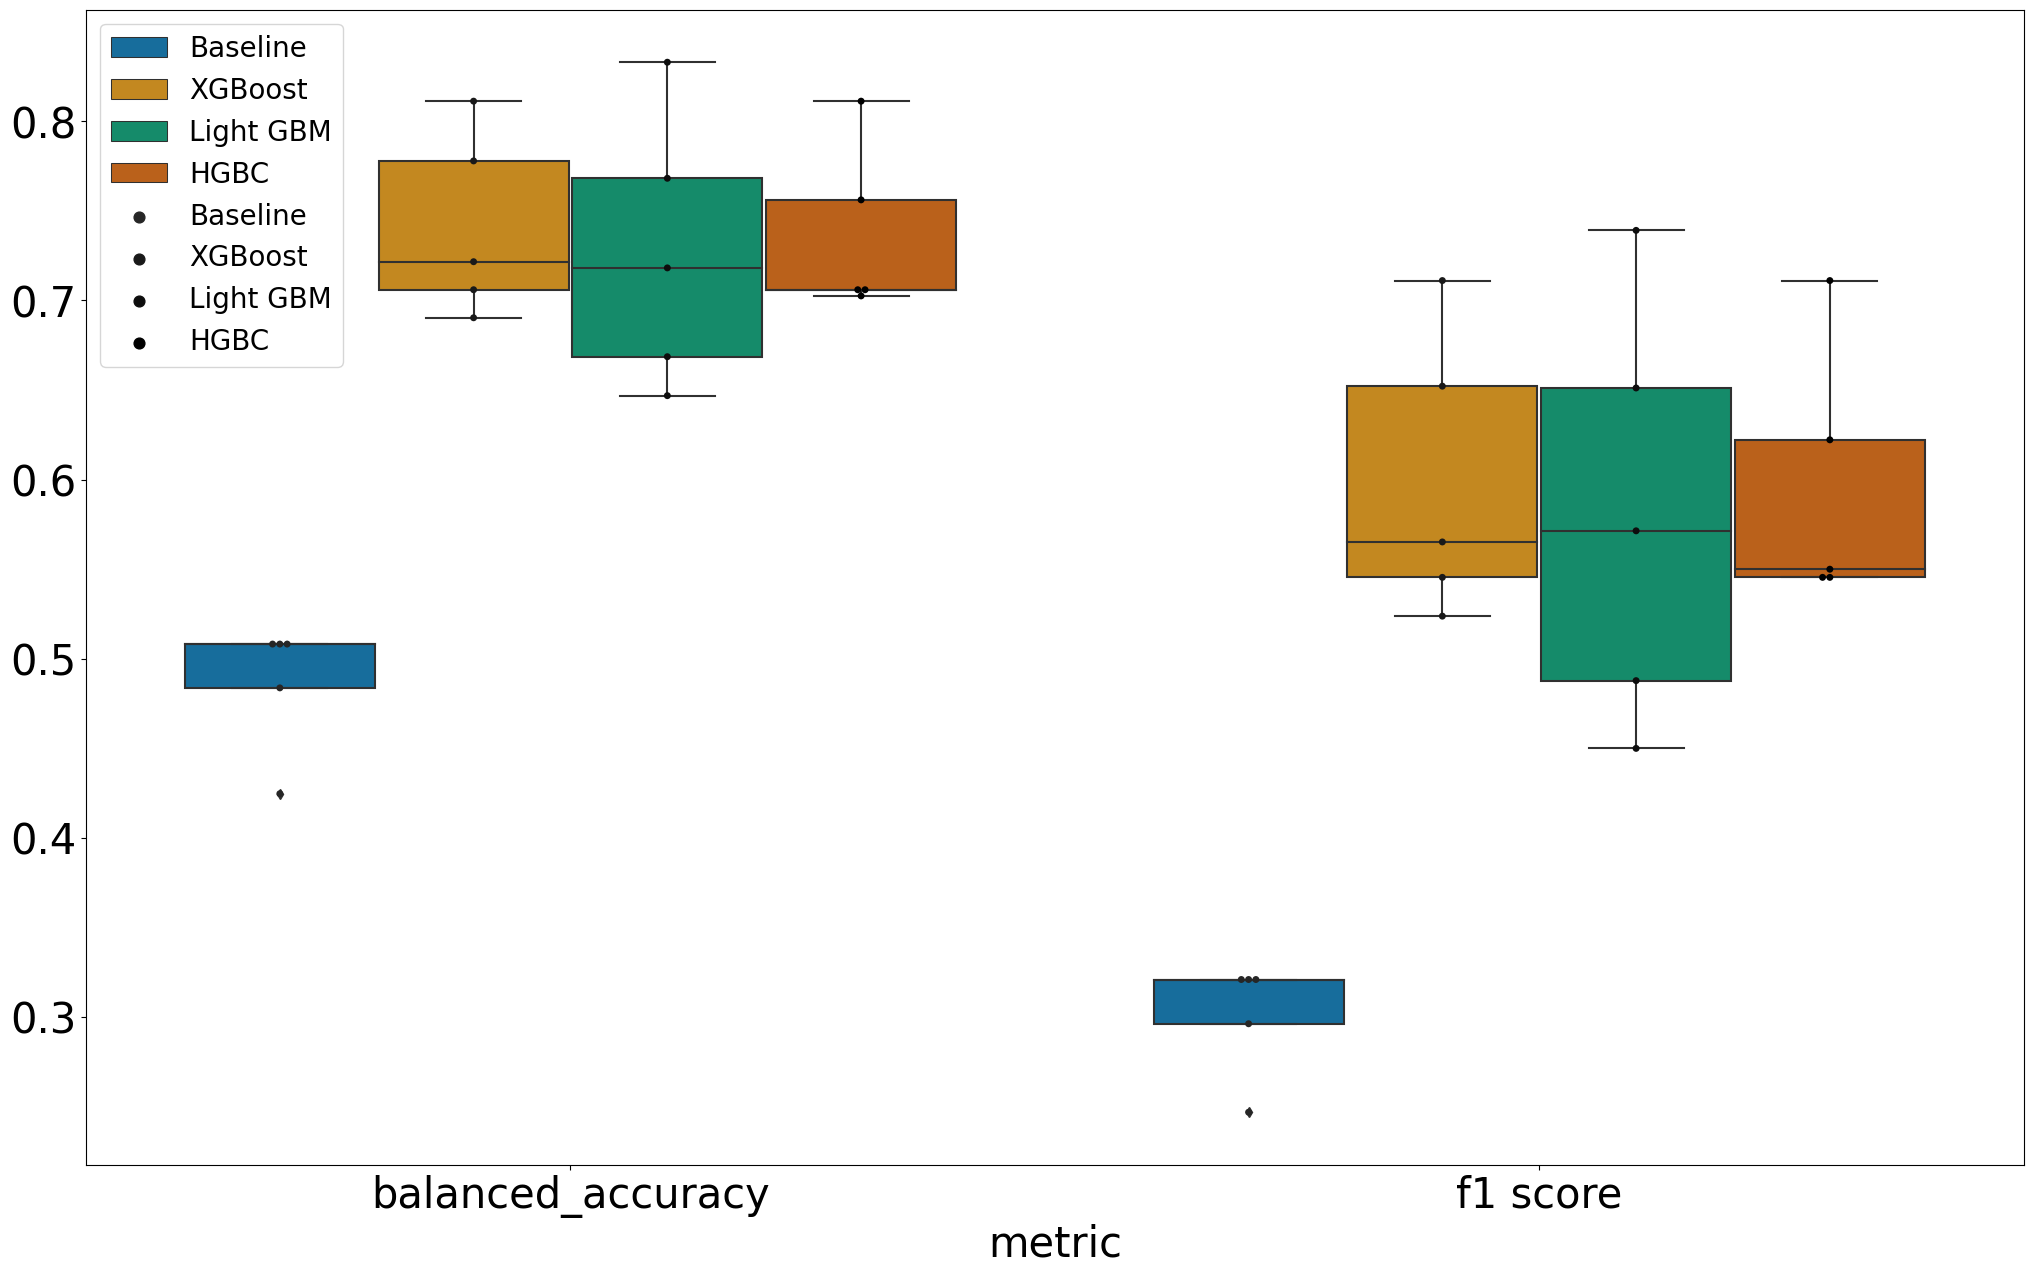

In [68]:
rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, palette="colorblind")
sns.swarmplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, dodge=True, color="k")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:8], labels[:8], fontsize=20)
ax.set_ylabel(None)

In [69]:
fig.savefig("cv_res_fqd.pdf")

Text(0, 0.5, '')

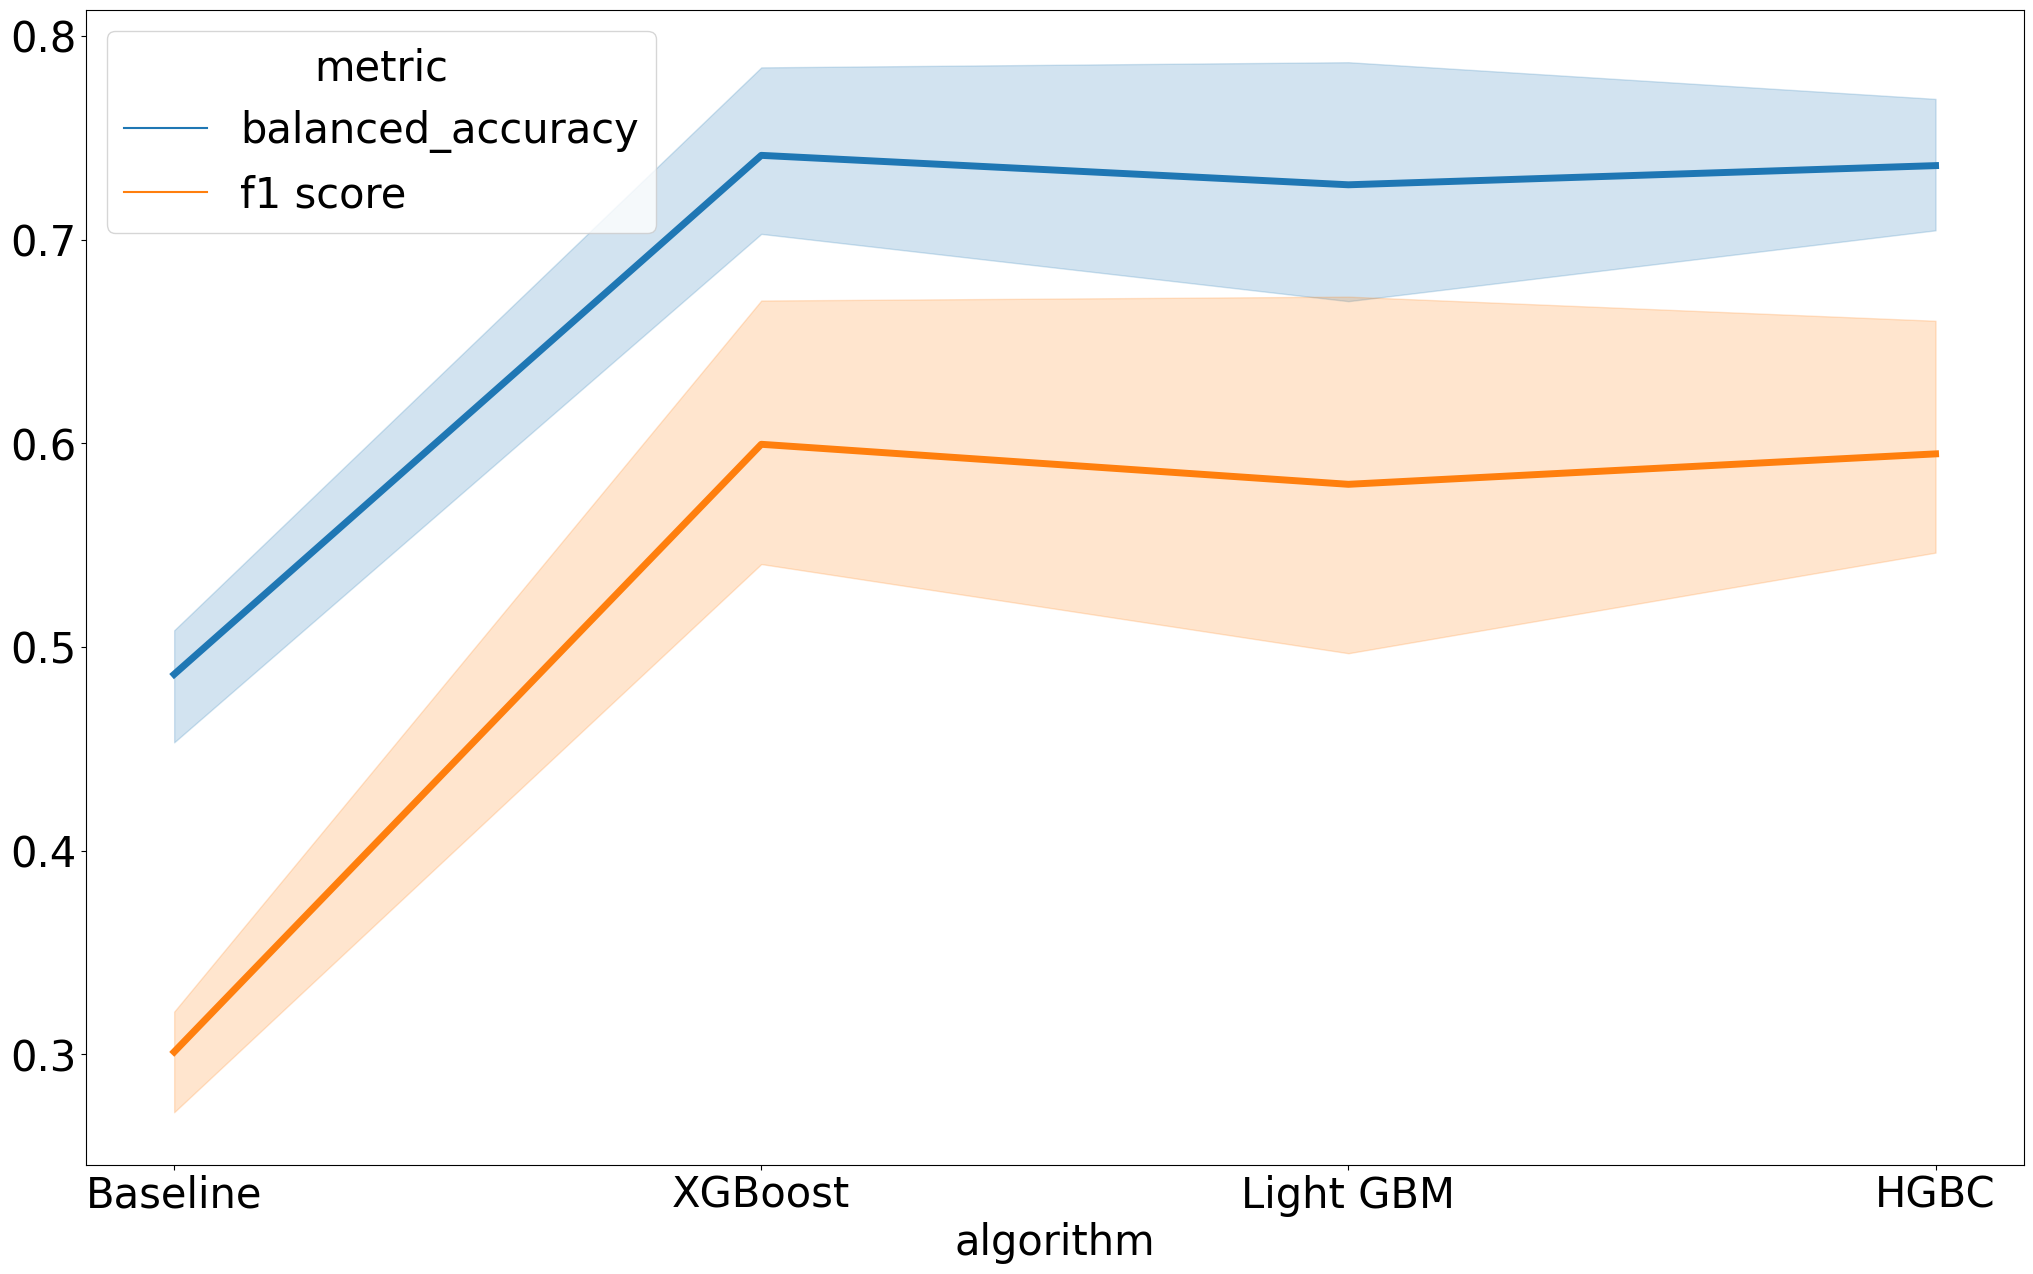

In [70]:
fig, ax = plt.subplots(figsize=(25,15))
sns.lineplot(x="algorithm", y="value", data=melted, hue="metric", ax=ax, lw=5)
ax.set_ylabel("")

# PCA features analysis

In [168]:
rcParams["font.size"] = 40

In [169]:
scaler = StandardScaler()
xx = scaler.fit_transform(xx)
oob_x = scaler.transform(oob_x)

In [170]:
xx = pca.fit_transform(xx)
oob_x = pca.transform(oob_x)

In [171]:
loading_scores = pd.Series(pca.components_[0], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

FQD_4_gap                     0.088298
quant_FQD_4_gap               0.088298
quant_FQD_4_zpve              0.088201
FQD_4_zpve                    0.088201
quant_FQD_4_alpha             0.088101
FQD_4_alpha                   0.088101
FQD_4_cv_per_atom             0.087949
quant_FQD_4_cv_per_atom       0.087949
quant_FQD_4_homo              0.087916
FQD_4_homo                    0.087916
quant_FQD_4_homo_per_atom     0.087851
FQD_4_homo_per_atom           0.087851
FQD_4_cv                      0.087850
quant_FQD_4_cv                0.087850
FQD_4_alpha_per_atom          0.087637
quant_FQD_4_alpha_per_atom    0.087637
FQD_4_gap_per_atom            0.087539
quant_FQD_4_gap_per_atom      0.087539
quant_FQD_4_g298_per_atom     0.087448
FQD_4_g298_per_atom           0.087448
FQD_4_u0_per_atom             0.087447
quant_FQD_4_u0_per_atom       0.087447
quant_FQD_4_u298_per_atom     0.087447
FQD_4_u298_per_atom           0.087447
quant_FQD_4_h298_per_atom     0.087447
FQD_4_h298_per_atom      

In [172]:
loading_scores = pd.Series(pca.components_[1], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_8_homo_per_atom     0.104183
FQD_8_homo_per_atom           0.104183
quant_FQD_8_g298_per_atom     0.099942
FQD_8_g298_per_atom           0.099942
FQD_8_u0_per_atom             0.099941
quant_FQD_8_u0_per_atom       0.099941
quant_FQD_8_u298_per_atom     0.099941
FQD_8_u298_per_atom           0.099941
quant_FQD_8_h298_per_atom     0.099941
FQD_8_h298_per_atom           0.099941
FQD_8_gap_per_atom            0.099646
quant_FQD_8_gap_per_atom      0.099646
FQD_8_alpha_per_atom          0.098842
quant_FQD_8_alpha_per_atom    0.098842
quant_FQD_8_g298              0.095627
FQD_8_g298                    0.095627
quant_FQD_8_u0                0.095626
FQD_8_u0                      0.095626
FQD_8_u298                    0.095626
quant_FQD_8_u298              0.095626
FQD_8_h298                    0.095626
quant_FQD_8_h298              0.095626
FQD_7_g298_per_atom           0.095002
quant_FQD_7_g298_per_atom     0.095002
FQD_7_u0_per_atom             0.095002
quant_FQD_7_u0_per_atom  

In [173]:
loading_scores = pd.Series(pca.components_[2], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_2_cv_per_atom       0.145806
FQD_2_cv_per_atom             0.145806
FQD_2_gap_per_atom            0.145522
quant_FQD_2_gap_per_atom      0.145522
quant_FQD_2_zpve_per_atom     0.144860
FQD_2_zpve_per_atom           0.144860
FQD_2_alpha_per_atom          0.144199
quant_FQD_2_alpha_per_atom    0.144199
FQD_2_homo_per_atom           0.143330
quant_FQD_2_homo_per_atom     0.143330
quant_FQD_2_lumo_per_atom     0.142893
FQD_2_lumo_per_atom           0.142893
FQD_2_g298_per_atom           0.133667
quant_FQD_2_g298_per_atom     0.133667
FQD_2_u0_per_atom             0.133663
quant_FQD_2_u0_per_atom       0.133663
quant_FQD_2_u298_per_atom     0.133663
FQD_2_u298_per_atom           0.133663
FQD_2_h298_per_atom           0.133662
quant_FQD_2_h298_per_atom     0.133662
FQD_2_lumo                    0.083263
quant_FQD_2_lumo              0.083263
quant_FQD_5_mu                0.078624
FQD_5_mu                      0.078624
FQD_4_mu                      0.076984
quant_FQD_4_mu           

In [174]:
loading_scores = pd.Series(pca.components_[3], index=x.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_2_h298              0.118418
FQD_2_h298                    0.118418
quant_FQD_2_u298              0.118418
FQD_2_u298                    0.118418
FQD_2_u0                      0.118418
quant_FQD_2_u0                0.118418
quant_FQD_2_g298              0.118416
FQD_2_g298                    0.118416
quant_FQD_6_gap_per_atom      0.098066
FQD_6_gap_per_atom            0.098066
FQD_6_cv_per_atom             0.097157
quant_FQD_6_cv_per_atom       0.097157
quant_FQD_6_zpve_per_atom     0.095868
FQD_6_zpve_per_atom           0.095868
quant_FQD_6_homo_per_atom     0.093824
FQD_6_homo_per_atom           0.093824
quant_FQD_2_mu                0.093608
FQD_2_mu                      0.093608
quant_FQD_6_alpha_per_atom    0.093226
FQD_6_alpha_per_atom          0.093226
quant_FQD_2_cv                0.088598
FQD_2_cv                      0.088598
FQD_3_mu                      0.088515
quant_FQD_3_mu                0.088515
quant_FQD_2_homo              0.087889
FQD_2_homo               

## Check which fragments are most important by atoms count

In [175]:
import itertools
from collections import Counter
keys = [f"PC{i}" for i in range(1,8)]
pc_dict = {k: None for k in keys}
pc_props_whole = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=x.columns)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in [f"{j}" for j in range(1,10)]]
    pc_dict[f"PC{i+1}"] = Counter(PC_props)
    pc_props_whole += PC_props

pc_dict

{'PC1': Counter({'4': 30, '5': 10}),
 'PC2': Counter({'8': 24, '7': 16}),
 'PC3': Counter({'2': 24, '5': 2, '4': 2, '6': 8, '3': 4}),
 'PC4': Counter({'2': 16, '6': 10, '3': 10, '9': 4}),
 'PC5': Counter({'2': 14, '3': 12, '7': 6, '5': 4, '4': 2, '8': 2}),
 'PC6': Counter({'6': 20, '7': 4, '8': 4, '9': 10, '2': 2}),
 'PC7': Counter({'9': 12, '7': 12, '8': 10, '2': 4, '5': 2})}

In [176]:
Counter(pc_props_whole).most_common(5)

[('2', 60), ('8', 40), ('7', 38), ('6', 38), ('4', 34)]

## Check which fragments are most important by quantum feature

In [177]:
pc_dict2 = {k: None for k in keys}
pc_props_whole2 = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=x.columns)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in qprops]
    pc_dict2[f"PC{i+1}"] = Counter(PC_props)
    pc_props_whole2 += PC_props


pc_dict2

{'PC1': Counter({'gap': 6,
          'zpve': 8,
          'alpha': 4,
          'cv': 6,
          'homo': 4,
          'g298': 2,
          'u0': 2,
          'u298': 2,
          'h298': 2,
          'lumo': 4}),
 'PC2': Counter({'homo': 2,
          'g298': 8,
          'u0': 8,
          'u298': 8,
          'h298': 8,
          'gap': 2,
          'alpha': 2,
          'cv': 2}),
 'PC3': Counter({'cv': 2,
          'gap': 4,
          'zpve': 6,
          'alpha': 6,
          'homo': 4,
          'lumo': 4,
          'g298': 2,
          'u0': 2,
          'u298': 2,
          'h298': 2,
          'mu': 6}),
 'PC4': Counter({'h298': 4,
          'u298': 4,
          'u0': 4,
          'g298': 4,
          'gap': 4,
          'cv': 4,
          'zpve': 2,
          'homo': 6,
          'mu': 4,
          'alpha': 4}),
 'PC5': Counter({'lumo': 2,
          'zpve': 6,
          'mu': 10,
          'alpha': 4,
          'gap': 2,
          'cv': 4,
          'homo': 2,
          'h29

In [178]:
Counter(pc_props_whole2).most_common(10)

[('mu', 48),
 ('g298', 28),
 ('zpve', 26),
 ('alpha', 26),
 ('u0', 26),
 ('cv', 24),
 ('homo', 24),
 ('u298', 24),
 ('h298', 24),
 ('gap', 18)]

In [179]:
xx.shape

(822, 17)

In [180]:
pca_df = pd.DataFrame(xx, columns=[f"PC{n}" for n in range(1, xx.shape[1]+1)])

In [181]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-11.541937,5.530202,0.666972,-2.984621,-2.258518,-3.732466,3.672526,3.878444,-0.783795,0.122371,-1.302233,-0.571411,0.563440,-1.294069,1.823382,-0.824487,1.348012
1,1.107438,-3.789625,-9.587601,-4.296775,0.340259,-0.001007,3.810066,1.730619,-0.136042,-1.873050,-0.423039,-1.148322,0.948198,0.552990,-0.052309,1.256020,-0.415219
2,-3.239642,-1.299366,-1.095145,-6.446164,-0.337334,3.370148,-0.244201,-2.752099,1.832215,-0.825379,0.275779,0.851201,-0.366408,-0.071948,0.399376,-1.419748,-0.602077
3,-9.450706,-7.099975,6.618473,6.488813,-5.200453,4.421515,0.615500,3.283119,-0.560984,-1.510246,-3.539296,-0.569688,-2.117981,0.990247,1.128411,1.074399,-0.099426
4,11.113878,2.345731,-4.589641,1.773616,-8.033341,-2.948051,2.539527,-1.069423,2.656882,1.163501,0.795553,-2.188701,-1.052350,0.230873,-0.810729,0.518523,0.056533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,2.381609,-2.678942,-7.102515,-4.460411,0.606529,1.234653,3.410725,0.523475,-1.389062,-0.484993,-0.153245,-0.469106,0.950373,0.771526,0.687671,0.162110,-0.552238
818,8.310031,-0.894222,-5.483010,-0.538906,-2.594091,-0.408040,0.381239,-0.170334,0.838072,-0.665359,-0.428536,-1.748456,0.831549,1.612438,-1.317487,-0.402955,0.241355
819,-2.091300,0.761913,4.524891,-3.905706,-4.060434,0.304759,-0.664535,-4.812213,4.404881,1.241310,0.133611,1.358117,-0.347369,-1.118874,2.531303,3.102123,-0.253205
820,-9.565656,-19.772232,-6.237476,9.850233,8.071114,-12.149438,-1.943585,1.863238,4.309275,1.782302,4.520071,0.411125,-1.618365,-1.075076,-1.515010,-0.703502,0.500437


### Visualize PCA

In [182]:
rcParams["font.size"] = 25

In [183]:
for i, v in enumerate((pca.explained_variance_ratio_*100).cumsum()):
    print(i, f"{v:.3}")

0 28.8
1 47.0
2 57.2
3 66.4
4 71.5
5 76.3
6 79.9
7 83.4
8 85.7
9 87.9
10 89.7
11 91.3
12 92.6
13 93.4
14 94.2
15 94.9
16 95.5


Text(0, 0.5, 'summary % variance explained')

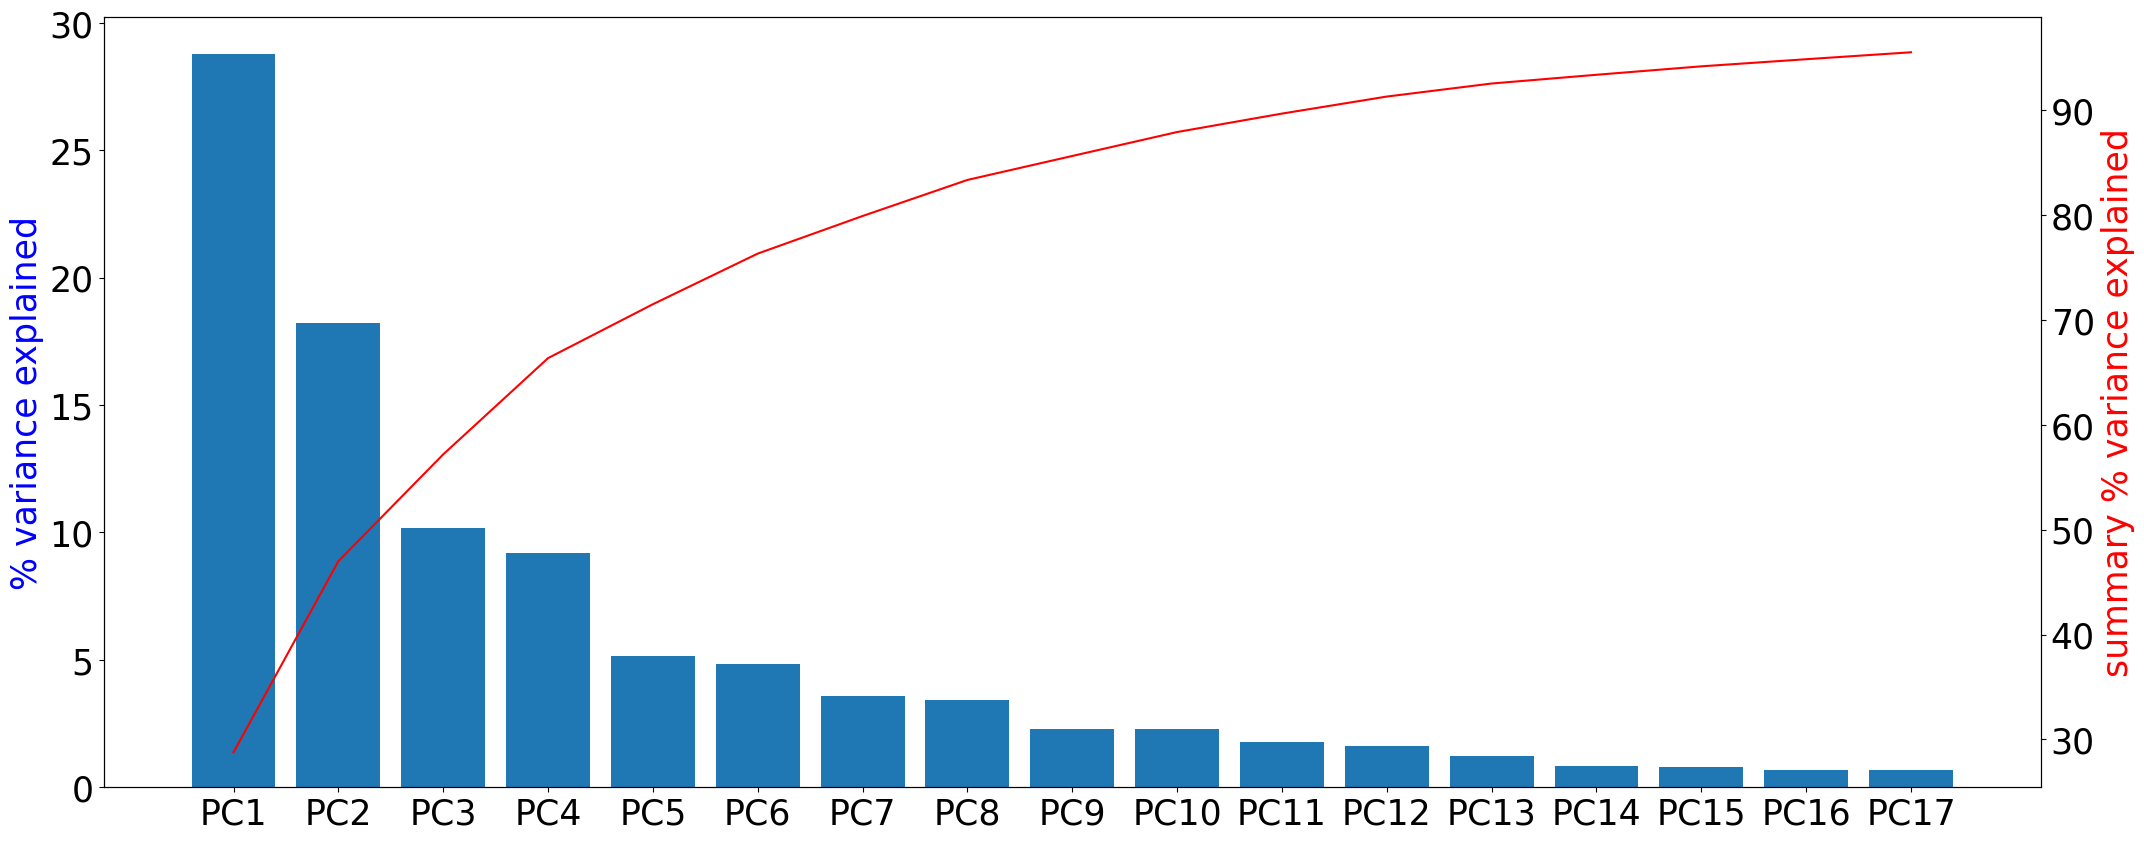

In [184]:
pcs = [f"PC{n}" for n in range(1, xx.shape[1]+1)]
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(pcs, pca.explained_variance_ratio_*100)
ax2 = ax.twinx()
ax2.plot(pcs, (pca.explained_variance_ratio_*100).cumsum(), c="r")
ax.set_ylabel("% variance explained", color="b")
ax2.set_ylabel("summary % variance explained", color="r")

In [185]:
fig.savefig("scree_plot_fqd.pdf")

### 2D

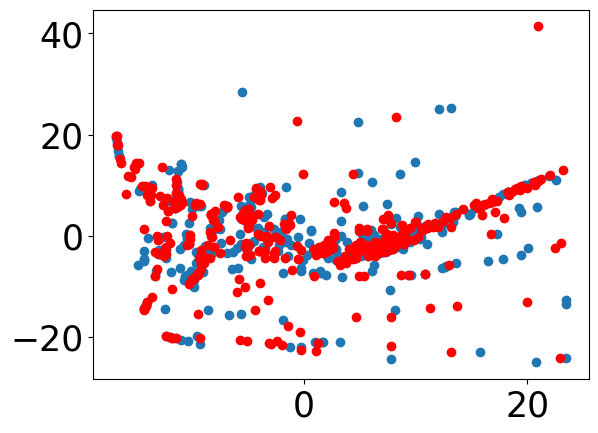

In [186]:
fig, ax = plt.subplots()
ax.scatter(pca_df["PC1"][yy==1], pca_df["PC2"][yy==1])
ax.scatter(pca_df["PC1"][yy==0], pca_df["PC2"][yy==0], c="r")

### 3D

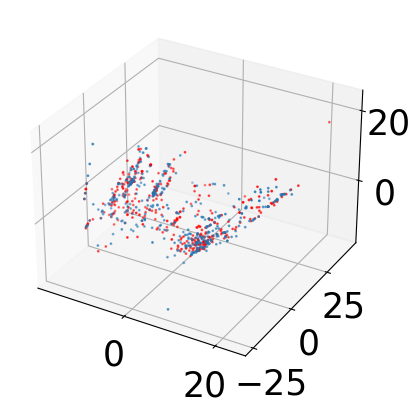

In [187]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(pca_df["PC1"][yy==1], pca_df["PC2"][yy==1], pca_df["PC3"][yy==1], s=1)
ax.scatter(pca_df["PC1"][yy==0], pca_df["PC2"][yy==0], pca_df["PC3"][yy==0], c="r", s=1)